In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn import tree

<p> Here I load the data in a dataframe assigned to the variable df1. Then I show the top 5 rows of the dataframe to show what kind of data I will be working with. <p> 

In [4]:
df1 = pd.read_csv('C:/Users/Jjcca/Desktop/IS485/StudentsPerformance.csv')

In [5]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h6> Now I'm going to pull the columns that I want from df1 and create a new dataset to remove the data I don't want. <h6>

In [6]:
parent = df1['parental level of education']
math = df1['math score']
reading = df1['reading score']
writing = df1['writing score']

In [7]:
df_parent = pd.DataFrame(parent)
df_math = pd.DataFrame(math)
df_reading = pd.DataFrame(reading)
df_writing = pd.DataFrame(writing)
df = pd.concat([df_parent, df_math, df_reading, df_writing], axis=1)
print(df)

    parental level of education  math score  reading score  writing score
0             bachelor's degree          72             72             74
1                  some college          69             90             88
2               master's degree          90             95             93
3            associate's degree          47             57             44
4                  some college          76             78             75
5            associate's degree          71             83             78
6                  some college          88             95             92
7                  some college          40             43             39
8                   high school          64             64             67
9                   high school          38             60             50
10           associate's degree          58             54             52
11           associate's degree          40             52             43
12                  high school       

<p>Below we can see that there is 1000 rows of data. The data was taken from Kaggle and has already been cleaned. Math Scores for the 1000 participants carry a mean of 66. Reading scores carry a mean of 69, and writing scores carry a mean of 68.<p>

In [8]:
df.describe(include='all')

,parental level of education,math score,reading score,writing score
count,1000,1000.00000,1000.000000,1000.000000
unique,6,NaN,NaN,NaN
top,some college,NaN,NaN,NaN
freq,226,NaN,NaN,NaN
mean,NaN,66.08900,69.169000,68.054000
std,NaN,15.16308,14.600192,15.195657
min,NaN,0.00000,17.000000,10.000000
25%,NaN,57.00000,59.000000,57.750000
50%,NaN,66.00000,70.000000,69.000000
75%,NaN,77.00000,79.000000,79.000000


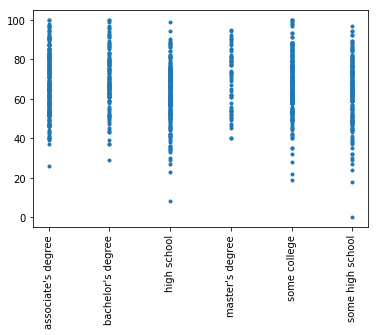

In [9]:
plt.scatter(df['parental level of education'], df['math score'], marker='.')
plt.xticks(rotation=90)
plt.show()

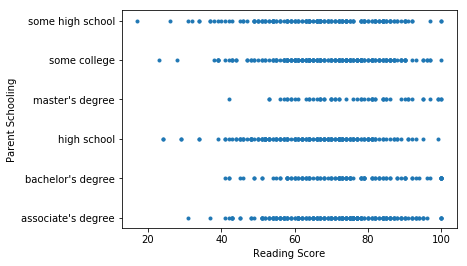

In [10]:
plt.scatter(df['reading score'],df['parental level of education'], marker='.')
plt.xlabel('Reading Score')
plt.ylabel('Parent Schooling')
plt.show()

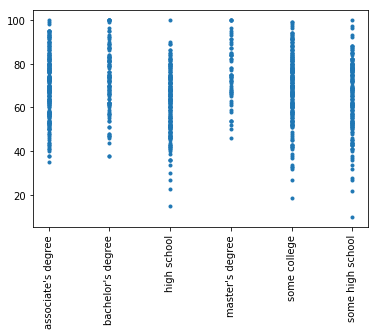

In [11]:
plt.scatter(df['parental level of education'], df['writing score'], marker='.')
plt.xticks(rotation=90)
plt.show()

In [12]:
df.head()

,parental level of education,math score,reading score,writing score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75


In [13]:
from mpl_toolkits.mplot3d import Axes3D

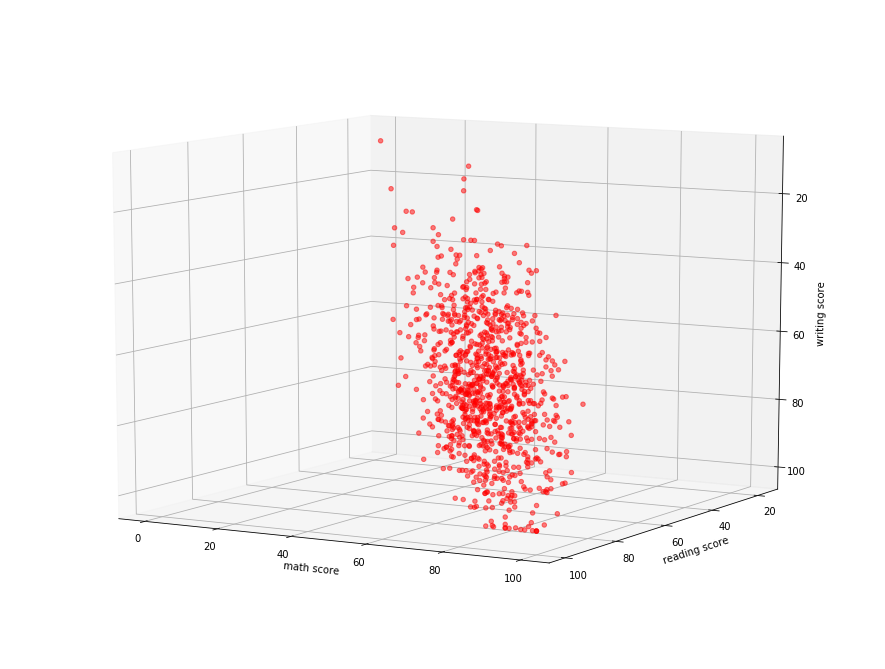

In [14]:
fig = plt.figure(1, figsize=(12, 9))
ax = Axes3D(fig, elev=-170, azim=240)

ax.scatter(df['math score'], df['reading score'], df['writing score'], s=20, alpha=.5, c='red')
ax.set_xlabel('math score')
ax.set_ylabel('reading score')
ax.set_zlabel('writing score')
plt.show()
plt.close()
fig.clf()

<p> After doing some exploratory data analysis we can see that the data closely matches one another. The 2D scatter plots explore the direct correlation between parental level of education and one of the testing categories. I wanted to try the 3D plot to see if the data would separate at all. I want to test if the model can correctly predict the level of schooling the parents have finished. In other words, is there a strong enough correlation between the math, writing, and reading scores of these students, to correctly predict what level of schooling the parents completed. <p> 

This is a supervised learning classification problem. Try decision tree, then K-Nearest Neighbors

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [16]:
X = df.values[:,1:4]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)
assert len(X_train) + len(X_test) == len(X)

In [17]:
#initiate decision tree classifier and fit training data
jc = tree.DecisionTreeClassifier()
jc = jc.fit(X_train, y_train)

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_prediction = jc.predict(X_test)
g = classification_report(y_test, y_prediction)
print(g)

                    precision    recall  f1-score   support

associate's degree       0.34      0.52      0.42        21
 bachelor's degree       0.30      0.25      0.27        12
       high school       0.17      0.33      0.22        12
   master's degree       0.00      0.00      0.00         4
      some college       0.38      0.19      0.26        31
  some high school       0.08      0.05      0.06        20

       avg / total       0.26      0.25      0.24       100



<b>Thoughts:<b>

The decision tree classifier did very poor in classifying the parent's degrees, I will try to tune hyperparameters to increase scores.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn= KNeighborsClassifier(n_neighbors=7)
knn= knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)
print(classification_report(y_test, y_prediction))

                    precision    recall  f1-score   support

associate's degree       0.28      0.52      0.37        21
 bachelor's degree       0.22      0.17      0.19        12
       high school       0.05      0.08      0.06        12
   master's degree       0.25      0.25      0.25         4
      some college       0.57      0.26      0.36        31
  some high school       0.15      0.10      0.12        20

       avg / total       0.31      0.25      0.25       100



K-Neighbors came out with a slightly better average/total, however, some individual sections performed worse than before such as high school. K-Neighbors did a much better job of classifying the master's degree than the decision tree did.

In [1]:
#try stnadardscaler(), (model) logistic regression, regularization, pipeline, clean up page, also try R^2 (accuracy score)

Now I am going to try using support vector machines model.

In [34]:
from sklearn import svm

In [35]:
df.head()

,parental level of education,math score,reading score,writing score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75


In [36]:
#initiate model
svm = svm.SVC()

svm = svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

associate's degree       0.18      0.48      0.26        21
 bachelor's degree       0.50      0.08      0.14        12
       high school       0.13      0.17      0.15        12
   master's degree       0.00      0.00      0.00         4
      some college       0.39      0.23      0.29        31
  some high school       0.11      0.05      0.07        20

       avg / total       0.26      0.21      0.19       100



The support vector machines model did not classify any of the Master's degree category. Overall, the k-neighbors model worked the best.

<b> Conclusion: </b>
Overall, the dataset used was pretty weak with only 1,000 rows of data. Due to this I could only test on 10% of the data. This most likely gave up accuracy. If I were to do this again I would choose a different data set to test on. The results I received did not show any promise. The results received were nothing to base any future decisions on.